In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def thomas_method(A, b):
    n = A.shape[0]
    x = np.zeros(n)
    alpha = np.zeros(n - 1)
    beta = np.zeros(n)

    alpha[0] = -A[0][1] / A[0][0]
    beta[0] = b[0] / A[0][0]
    for i in range(1, n - 1):
        y = A[i][i] + A[i][i - 1] * alpha[i - 1]
        alpha[i] = - A[i][i + 1] / y
        beta[i] = (b[i] - A[i][i - 1] * beta[i - 1]) / y
    beta[n - 1] = (b[n - 1] - A[n - 1][n - 2] * beta[n - 2]) / (A[n - 1][n - 1] + A[n - 1][n - 2] * alpha[n - 2])

    x[n - 1] = beta[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = alpha[i] * x[i + 1] + beta[i]

    return x

In [45]:
def f(x):
    return 1 / (1 + 25 * x ** 2)

def g(x):
    return np.cos(1 + np.cos(x) + np.sin(x) ** 2)

In [40]:
def lagrange(f, x1, x2, n):
    x_ = np.linspace(x1, x2, n)
    f_ = np.array([f(x_i) for x_i in x_])
    def _lagrange(x):
        L = 0
        for k in range(n):
            s = f_[k]
            for i in range(n):
                if i == k:
                    continue
                s *= (x - x_[i]) / (x_[k] - x_[i])
            L += s
        return L

    return _lagrange

In [35]:
def find_c(h, f, n):
    A = np.zeros((n - 2, n - 2))
    b = np.zeros(n - 2)

    for i in range(1, n - 1):
        if i > 1:
            A[i - 1, i - 2] = h[i - 1]  # нижняя диагональ
        A[i - 1, i - 1] = 2 * (h[i - 1] + h[i])  # главная диагональ
        if i < n - 2:
            A[i - 1, i] = h[i]  # верхняя диагональ
        b[i - 1] = 3 * ((f[i + 1] - f[i]) / h[i] - (f[i] - f[i - 1]) / h[i - 1])

    c = np.zeros(n)
    if n > 2:
        c[1:n - 1] = thomas_method(A, b)

    return c

In [36]:
def cubic_spline(f, x1, x2, n):
    x_nodes = np.linspace(x1, x2, n)
    f_values = np.array([f(x) for x in x_nodes])
    h = np.diff(x_nodes)

    c = find_c(h, f_values, n)
    a = f_values[:-1]
    b = np.zeros(n - 1)
    d = np.zeros(n - 1)

    for i in range(n - 1):
        b[i] = (f_values[i + 1] - f_values[i]) / h[i] - h[i] * (c[i + 1] + 2 * c[i]) / 3
        d[i] = (c[i + 1] - c[i]) / (3 * h[i])

    def _cubic_spline(x):
        i = np.searchsorted(x_nodes, x) - 1
        i = np.clip(i, 0, n - 2)
        dx = x - x_nodes[i]
        return a[i] + b[i] * dx + c[i] * dx ** 2 + d[i] * dx ** 3

    return _cubic_spline


In [48]:
x5 = np.linspace(-1, 1, 5)
x20 = np.linspace(-1, 1, 20)

In [49]:
lagrange_f5 = lagrange(f, -1, 1, 5)
lagrange_f20 = lagrange(f, -1, 1, 20)

In [50]:
print("Значение посередине между двумя левыми и двумя правыми точками разбиения")
print(f"Для 5 узлов: слева {lagrange_f5((x5[0] + x5[1]) / 2)}, справа {lagrange_f5((x5[3] + x5[4]) / 2)}")
print(f"Для 20 узлов: слева {lagrange_f20((x20[0] + x20[1]) / 2)}, справа {lagrange_f20((x20[18] + x20[19]) / 2)}")

Значение посередине между двумя левыми и двумя правыми точками разбиения
Для 5 узлов: слева -0.3568260941644562, справа -0.35682609416445626
Для 20 узлов: слева 6.0165252672813505, справа 6.016525267282094


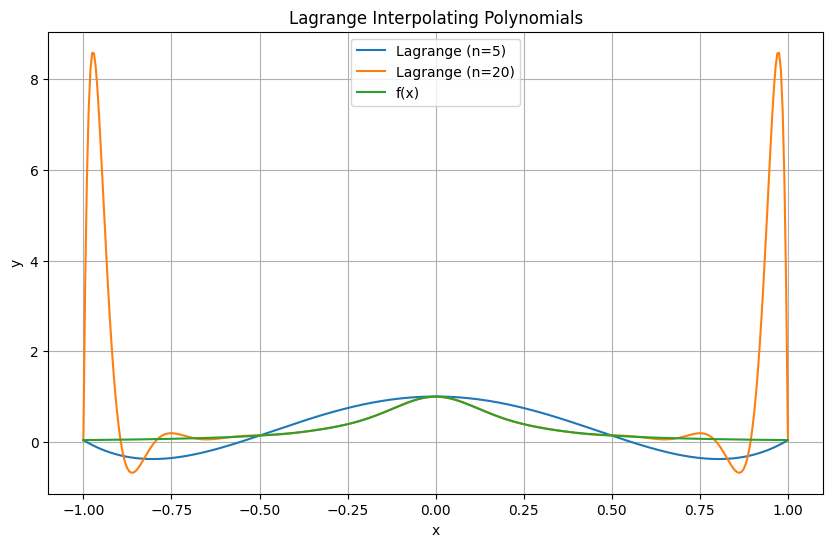

In [51]:
x_plot = np.linspace(-1, 1, 400)

y_f5 = [lagrange_f5(x) for x in x_plot]
y_f20 = [lagrange_f20(x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_f5, label="Lagrange (n=5)")
plt.plot(x_plot, y_f20, label="Lagrange (n=20)")
plt.plot(x_plot, f(x_plot), label="f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lagrange Interpolating Polynomials")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
spline_f5 = cubic_spline(f, -1, 1, 5)
spline_f20 = cubic_spline(f, -1, 1, 20)

In [52]:
print("Значение посередине между двумя левыми и двумя правыми точками разбиения")
print(f"Для 5 узлов: слева {spline_f5((x5[0] + x5[1]) / 2)}, справа {spline_f5((x5[3] + x5[4]) / 2)}")
print(f"Для 20 узлов: слева {spline_f20((x20[0] + x20[1]) / 2)}, справа {spline_f20((x20[18] + x20[19]) / 2)}")

Значение посередине между двумя левыми и двумя правыми точками разбиения
Для 5 узлов: слева -0.0396930655551345, справа -0.03969306555513447
Для 20 узлов: слева 0.04277014291580439, справа 0.042770142915804395


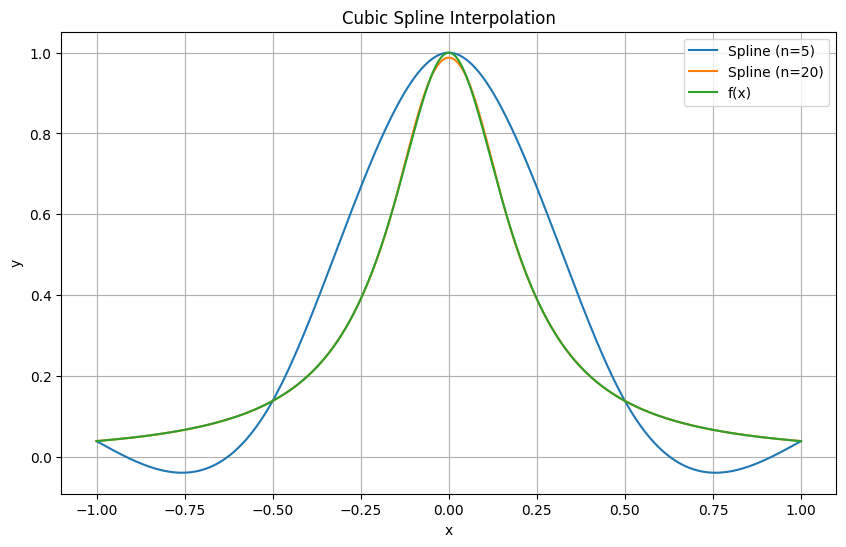

In [54]:
x_plot = np.linspace(-1, 1, 400)

y_f5 = [spline_f5(x) for x in x_plot]
y_f20 = [spline_f20(x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_f5, label="Spline (n=5)")
plt.plot(x_plot, y_f20, label="Spline (n=20)")
plt.plot(x_plot, f(x_plot), label="f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
lagrange_g20 = lagrange(g, 0, np.pi, 20)
spline_g20 = cubic_spline(g, 0, np.pi, 20)

In [63]:
x20 = np.linspace(0, np.pi, 20)
print("Промежуточные значения между двумя точками разбиения")
print(f"Для полинома Лагранжа: {[lagrange_g20((x20[i - 1] + x20[i]) / 2) for i in range(1, 20)]}")
print(f"Для сплайна: {[spline_g20((x20[i - 1] + x20[i]) / 2) for i in range(1, 20)]}")

Промежуточные значения между двумя точками разбиения
Для полинома Лагранжа: [-0.4194333627382777, -0.4429166629082648, -0.48497873673111747, -0.5358564986679083, -0.5839922675863202, -0.6179708043888055, -0.6277234044214499, -0.6039703839795285, -0.5368566590085928, -0.4161468301520032, -0.23529075313951398, 0.0009255451267718731, 0.26988118890370477, 0.5331049531747383, 0.7498332384189482, 0.8951688466732909, 0.9699967830613281, 0.9958605983380633, 1.0001413534169425]
Для сплайна: [-0.42041400833527015, -0.44263410371463985, -0.48506539713114366, -0.5358329268062857, -0.5839921945141571, -0.6179657670786541, -0.6277269460371223, -0.6039762362329716, -0.5368525451366951, -0.4161173084389996, -0.23523390150270396, 0.0009832396704525358, 0.269894743092399, 0.533052182313501, 0.7497454853822306, 0.8951013130595923, 0.9699881441664697, 0.9958874021552251, 1.0000809966696405]


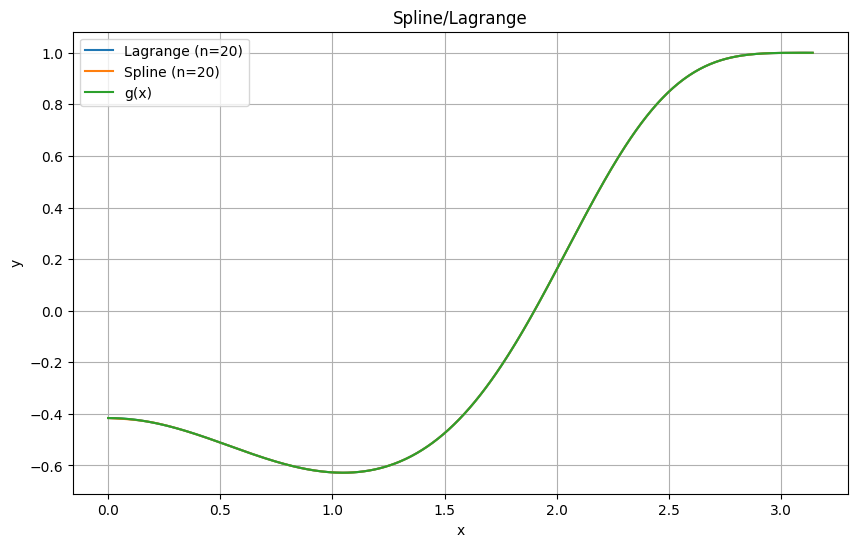

In [64]:
x_plot = np.linspace(0, np.pi, 400)

y_s = [spline_g20(x) for x in x_plot]
y_l = [lagrange_g20(x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_l, label="Lagrange (n=20)")
plt.plot(x_plot, y_s, label="Spline (n=20)")
plt.plot(x_plot, g(x_plot), label="g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Spline/Lagrange")
plt.legend()
plt.grid(True)
plt.show()